In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
books = pd.read_csv("book.csv")
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Dataframe is already sorted into dummy variable 

In [4]:
# here we use apiori function 

frequent_itemsets = apriori(books, min_support = 0.0075, max_len = 4, use_colnames = True)  #how we decided min support ?
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
461,0.0090,"(GeogBks, ItalArt, Florence, ArtBks)"
462,0.0125,"(ArtBks, ItalArt, ItalCook, ItalAtlas)"
463,0.0095,"(ItalArt, ItalCook, Florence, ArtBks)"
464,0.0090,"(GeogBks, ItalArt, ItalCook, ItalAtlas)"


In [5]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)

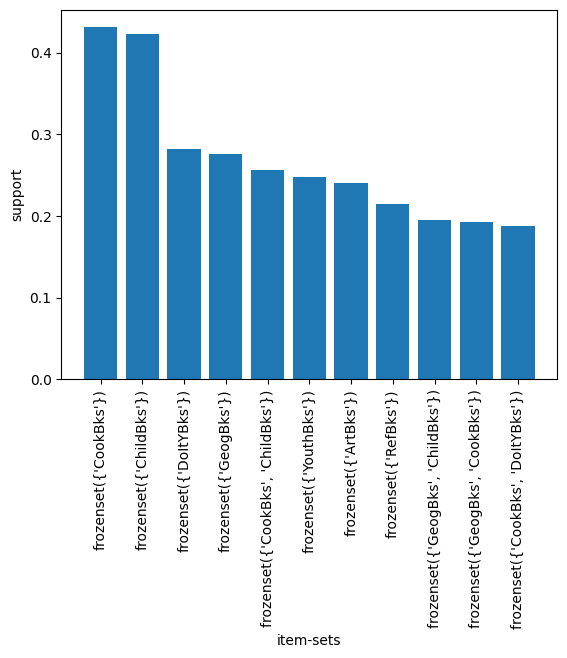

In [6]:
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11])
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=90)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [7]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2143,"(RefBks, ItalArt)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.01614,5.611429
2142,"(ItalAtlas, ArtBks)","(RefBks, ItalArt)",0.0180,0.0200,0.0165,0.916667,45.833333,0.01614,11.760000
3340,"(GeogBks, ItalAtlas)","(RefBks, ItalArt)",0.0205,0.0200,0.0115,0.560976,28.048780,0.01109,2.232222
3341,"(RefBks, ItalArt)","(GeogBks, ItalAtlas)",0.0200,0.0205,0.0115,0.575000,28.048780,0.01109,2.304706
3151,"(ItalCook, ItalAtlas)","(RefBks, ItalArt)",0.0230,0.0200,0.0125,0.543478,27.173913,0.01204,2.146667
3146,"(RefBks, ItalArt)","(ItalCook, ItalAtlas)",0.0200,0.0230,0.0125,0.625000,27.173913,0.01204,2.605333
2606,"(ChildBks, ItalAtlas)","(RefBks, ItalArt)",0.0285,0.0200,0.0145,0.508772,25.438596,0.01393,1.995000
2607,"(RefBks, ItalArt)","(ChildBks, ItalAtlas)",0.0200,0.0285,0.0145,0.725000,25.438596,0.01393,3.532727
3882,"(RefBks, ItalArt)","(DoItYBks, ItalAtlas)",0.0200,0.0190,0.0095,0.475000,25.000000,0.00912,1.868571
3887,"(DoItYBks, ItalAtlas)","(RefBks, ItalArt)",0.0190,0.0200,0.0095,0.500000,25.000000,0.00912,1.960000


#  Extra part

In [8]:
def to_list(i):
    return (sorted(list(i)))

In [9]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

In [10]:
ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

In [11]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [12]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [13]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :] 

In [14]:
rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
114,"(DoItYBks, ArtBks)",(ChildBks),0.1235,0.4230,0.0950,0.769231,1.818512,0.042760,2.500333
120,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.4230,0.0950,0.822511,1.944470,0.046143,3.250902
58,(GeogBks),(YouthBks),0.2760,0.2475,0.1205,0.436594,1.764017,0.052190,1.335627
52,"(RefBks, CookBks)",(ChildBks),0.1525,0.4230,0.1225,0.803279,1.899004,0.057993,2.933083
1048,"(GeogBks, RefBks, YouthBks)",(ArtBks),0.0570,0.2410,0.0305,0.535088,2.220281,0.016763,1.632566
...,...,...,...,...,...,...,...,...,...
1618,"(Florence, DoItYBks)",(ChildBks),0.0315,0.4230,0.0225,0.714286,1.688619,0.009175,2.019500
4360,"(ItalArt, Florence, ArtBks)",(DoItYBks),0.0125,0.2820,0.0075,0.600000,2.127660,0.003975,1.795000
3480,"(ItalCook, DoItYBks, ItalAtlas)",(ChildBks),0.0125,0.4230,0.0110,0.880000,2.080378,0.005712,4.808333
312,"(RefBks, CookBks, YouthBks)",(ChildBks),0.0775,0.4230,0.0680,0.877419,2.074277,0.035218,4.707105


In [15]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3878,"(RefBks, ItalArt, DoItYBks)",(ItalAtlas),0.0110,0.037,0.0095,0.863636,23.341523,0.009093,7.062000
3334,"(GeogBks, RefBks, ItalArt)",(ItalAtlas),0.0135,0.037,0.0115,0.851852,23.023023,0.011000,6.500250
2162,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.037,0.0165,0.825000,22.297297,0.015760,5.502857
2136,"(RefBks, ItalArt, ArtBks)",(ItalAtlas),0.0200,0.037,0.0165,0.825000,22.297297,0.015760,5.502857
2894,"(RefBks, ItalArt, CookBks)",(ItalAtlas),0.0165,0.037,0.0130,0.787879,21.294021,0.012389,4.539857
3142,"(RefBks, ItalArt, ItalCook)",(ItalAtlas),0.0160,0.037,0.0125,0.781250,21.114865,0.011908,4.402286
4210,"(RefBks, ItalArt, YouthBks)",(ItalAtlas),0.0110,0.037,0.0085,0.772727,20.884521,0.008093,4.237200
2908,"(RefBks, ItalCook, ArtBks)",(ItalAtlas),0.0235,0.037,0.0130,0.553191,14.951121,0.012130,2.155286
2430,"(GeogBks, RefBks, ItalCook)",(ItalAtlas),0.0290,0.037,0.0150,0.517241,13.979497,0.013927,1.994786
3122,"(RefBks, ItalCook, DoItYBks)",(ItalAtlas),0.0250,0.037,0.0125,0.500000,13.513514,0.011575,1.926000
